In [63]:
import pandas as pd
import numpy as np
from pandas import read_excel
import math

Dataset-1 : Intentional Homicides and Crimes victims

In [95]:
df1 = pd.read_excel('Intentional homicide victims by counts and rates p.xls')
df1.head()
df1.drop(['Subregion', 'Region', 'Source'], axis = 1, inplace = True)
# df1.head(10)
df1.drop([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2015], axis = 1, inplace = True)
df1.drop([2011, 2012, 2013, 2014, 2016], axis = 1, inplace = True)
df1.drop(['Unnamed: 23'], axis = 1, inplace = True)

df1.columns
df1.drop(['2001.1'], axis = 1, inplace = True)
df1.drop(['2002.1', '2003.1', '2004.1', '2005.1', '2015.1', '2006.1', '2007.1', '2008.1', '2009.1', '2010.1', '2011.1', '2012.1', '2013.1', '2014.1', '2016.1']
         , axis = 1, inplace = True)
df1.drop(['2000.1'], axis = 1, inplace = True)
df1.drop([2018, '2018.1'], axis = 1, inplace = True)
df1.rename(columns = {2017 : 'Count_of_Homicides'}, inplace = True)
df1.rename(columns = {'2017.1' : 'Rate per 100,000'}, inplace = True)
df1.isnull().values.any()
print(df1.isnull().sum())
df1.head(10)

Country                76
Count_of_Homicides    201
Rate per 100,000      201
dtype: int64


,Country,Count_of_Homicides,"Rate per 100,000"
0,Afghanistan,2424.0,6.678401
1,Albania,58.0,2.010978
2,Algeria,NaN,NaN
3,American Samoa,NaN,NaN
4,Andorra,NaN,NaN
5,Angola,NaN,NaN
6,Anguilla,NaN,NaN
7,Antigua and Barbuda,NaN,NaN
8,Argentina,2279.0,5.186955
9,Armenia,70.0,2.377080


In [ ]:
# index_names = df1[(df1['Homicide_Category'] == 'Percentage of male and female intentional homicide victims, Male') ].index
# df1.drop(index_names, inplace = True)
# index_names1 = df1[(df1['Homicide_Category'] == 'Percentage of male and female intentional homicide victims, Female')].index
# df1.drop(index_names1, inplace = True)
# df1.drop(['Homicide_Category'], axis = 1, inplace = True)


Dataset-2 : GDP per capita

In [97]:
df2 = pd.read_csv('GDP per capita.csv')
df2.head(10)
df2.drop(['Item'], axis = 1, inplace = True)
bekar_rows = df2[(df2['Year'] == 2015)].index
df2.drop(bekar_rows, inplace = True)
df2.drop(['Year'], axis = 1, inplace = True)
df2.rename(columns = {'Country or Area' : 'Country'}, inplace = True)
df2.rename(columns = {'Value' : 'GDP_per_capita'}, inplace = True)
df2.reset_index(drop=True, inplace=True)
df2.head(20)

,Country,GDP_per_capita
0,Afghanistan,592.777032
1,Albania,4516.055953
2,Algeria,4044.290175
3,Andorra,39231.338750
4,Angola,4095.811686
5,Anguilla,19280.931818
6,Antigua and Barbuda,15383.415188
7,Argentina,14627.615635
8,Armenia,3914.525246
9,Aruba,29005.625191


Dataset-3: HDI(Human Development Index)

In [110]:
df3 = pd.read_csv("Human Development Index (HDI).csv")
df3.drop(['HDI Rank (2018)'], axis = 1, inplace = True)
df3.rename(columns = {'2017' : 'HDI'}, inplace = True)
df3.reset_index(drop=True, inplace=True)
df3.head(10)

,Country,HDI
0,Afghanistan,0.493
1,Albania,0.789
2,Algeria,0.758
3,Andorra,0.852
4,Angola,0.576
5,Antigua and Barbuda,0.774
6,Argentina,0.832
7,Armenia,0.758
8,Australia,0.937
9,Austria,0.912


In [111]:
df3.to_excel("Human Development Index.xlsx", index = False)

Dataset 4: Unemployment Rate

In [27]:
df4 = pd.read_excel("Unemplyment rate(country wise).xlsx")
df4.head(10)

,Country,Unemployment_Rate
0,Afghanistan,11.2
1,Albania,13.8
2,Algeria,12.0
3,Andorra,3.7
4,Angola,7.1
5,Antigua and Barbuda,11.0
6,Argentina,8.3
7,Armenia,17.7
8,Australia,5.6
9,Austria,5.5


Dataset-5: Population Density (No. of people per square Km.)

In [125]:
df5 = pd.read_excel("Population Density(per sq. Km).xlsx")
df5.head(20)

,Country,Population Density(No. of People per sq. Km)
0,Afghanistan,55.5956
1,Albania,100.3200
2,Algeria,17.3800
3,Andorra,163.8300
4,Angola,23.9200
5,Antigua and Barbuda,216.8800
6,Argentina,15.8000
7,Armenia,99.0200
8,Australia,3.1800
9,Austria,105.1500


Dataset-6: GDP

In [101]:
df6 = pd.read_csv("GDP.csv")
# Bekar_rows = df5[(df5['Year'] == 2015)].index
# df6.drop(Bekar_rows, inplace = True)
df6.drop(['Item'], axis = 1, inplace = True)
df6.drop(['Year'], axis = 1, inplace = True)
df6['Log_GDP'] = np.log10(df6['Value'])
df6.rename(columns = {'Value': 'GDP'}, inplace = True)
df6.rename(columns = {'Country or Area' : 'Country'}, inplace = True)
# Type = df6.dtypes
# print(Type)
df6.head(10)

,Country,GDP,Log_GDP
0,Afghanistan,2.151550e+10,10.332751
1,Albania,1.302507e+10,10.114780
2,Algeria,1.673899e+11,11.223729
3,Andorra,3.020852e+09,9.480129
4,Angola,1.221239e+11,11.086801
5,Anguilla,2.811931e+08,8.449005
6,Antigua and Barbuda,1.467978e+09,9.166719
7,Argentina,6.426956e+11,11.808005
8,Armenia,1.152746e+10,10.061734
9,Aruba,3.056207e+09,9.485183


Dataset-7 : Internet Usage

In [84]:
df7 = pd.read_excel("Internet Users(by Country).xlsx")
df7.rename(columns = {'Internet Usage' : 'Internet Users(Percentage)'}, inplace = True)
df7.head(10)

,Country,Internet Users(Percentage)
0,Afghanistan,13.5000
1,Albania,71.8470
2,Algeria,47.6911
3,Andorra,91.5675
4,Angola,14.3391
5,Antigua and Barbuda,76.0000
6,Argentina,74.2949
7,Armenia,64.7449
8,Aruba,97.1700
9,Australia,86.5450


In [82]:
# df7 = pd.read_excel("Internet Users(by Country).xlsx")
# df7.head(10)

Dataset-8 : Poverty index

In [112]:
df8 = pd.read_excel("Population below PL.xlsx")
df8.head(20)

,Country,Population below poverty line
0,Afghanistan,54.5
1,Albania,14.3
2,Algeria,23.0
3,Andorra,NaN
4,Angola,36.6
5,Antigua and Barbuda,NaN
6,Argentina,25.7
7,Armenia,32.0
8,Australia,0.7
9,Austria,3.0


Dataset-9 : Life Expectancy

In [148]:
df9 = pd.read_excel("Life_expectancy.xlsx")
df9.info()
df9.shape
df9.rename(columns = {'Country or Area' : 'Country', 'Value':'Life_Expectancy'}, inplace = True)
df9.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  289 non-null    object 
 1   Value            251 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.6+ KB


,Country,Life_Expectancy
0,Afghanistan,62.32
1,Africa,60.25
2,Albania,77.49
3,Algeria,75.51
4,American Samoa,NaN
5,Andorra,NaN
6,Angola,57.74
7,Anguilla,NaN
8,Antigua and Barbuda,76.14
9,Argentina,75.67


Dataset-10 : Literacy Rate

In [167]:
df10 = pd.read_csv("Youth Literacy rate.csv")
df10.head(10)
lr_df10 = df10.loc[df10['Sex'] == 'All genders']
lr_df10.head(10)


,Reference Area,Time Period,Sex,Age group,Units of measurement,Observation Value
2,Afghanistan,2015,All genders,15-24 year olds,Percent,58.15490
5,Albania,2015,All genders,15-24 year olds,Percent,99.02920
6,Algeria,2015,All genders,15-24 year olds,Percent,96.75260
10,Angola,2015,All genders,15-24 year olds,Percent,72.92679
12,Argentina,2015,All genders,15-24 year olds,Percent,99.30437
15,Armenia,2015,All genders,15-24 year olds,Percent,99.84540
20,Aruba,2015,All genders,15-24 year olds,Percent,99.41220
21,Azerbaijan,2015,All genders,15-24 year olds,Percent,99.95600
25,Bahrain,2015,All genders,15-24 year olds,Percent,99.77188
29,Bangladesh,2015,All genders,15-24 year olds,Percent,83.19781


In [174]:
# lr_df10.drop(['Sex', 'Age group', 'Units of measurement', 'Time Period'], inplace = True, axis = 1)
lr_df10.rename(columns = {'Reference Area' : 'Country', 'Observation Value' : 'Literacy Rate'}, inplace = True)
lr_df10.head(10)
lr_df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 2 to 525
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Country        176 non-null    object 
 1   Literacy Rate  176 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


c:\users\jaswinder singh\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [196]:
df11 = pd.read_csv("BCG Immunization.csv")
df11.head(10)
df11.drop(['Year(s)', 'Value Footnotes'], axis = 1, inplace = True)
df11.rename(columns = {'Country or Area':'Country', 'Value':'BCG_Immunization'}, inplace = True)
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           160 non-null    object
 1   BCG_Immunization  160 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.6+ KB


In [199]:
df12 = pd.read_csv("Polio Immnization.csv")
df12.head()
df12.drop(['Year(s)', 'Value Footnotes'], axis = 1, inplace = True)
df12.rename(columns = {'Country or Area':'Country', 'Value':'Polio_Immunization'}, inplace = True)
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             194 non-null    object
 1   Polio_Immunization  194 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.2+ KB


In [203]:
df13 = pd.read_csv("GNI per capita.csv")
df13.head()
df13.drop(['Year(s)', 'Value Footnotes'], axis = 1, inplace = True)
df13.rename(columns = {'Country or Area':'Country', 'Value':'GNI_per_capita'}, inplace = True)
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country         166 non-null    object
 1   GNI_per_capita  166 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


## Merging the Data Frames together

In [104]:
merged_1 = pd.merge(df1, df2, on = ['Country'] )
merged_1.head(10)
merged_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 190
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             191 non-null    object 
 1   Count_of_Homicides  100 non-null    float64
 2   Rate per 100,000    100 non-null    float64
 3   GDP_per_capita      191 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.5+ KB


In [105]:
temp_merged = merged_1
temp_merged.to_excel("Temporary_Merged_Data.xlsx", index = False)

In [113]:
df_temp = pd.read_excel("Temporary_Merged_Data.xlsx")
df_temp.rename(columns = {'Rate per 100,000' : 'Homicide_Rate'}, inplace = True)
df_temp.head(20)

,Country,Homicide_Rate
0,Afghanistan,8.500000
1,Albania,3.400000
2,Algeria,1.500000
3,Andorra,1.245363
4,Angola,9.500000
5,Anguilla,25.674353
6,Antigua and Barbuda,5.000000
7,Argentina,6.400000
8,Armenia,3.800000
9,Aruba,NaN


In [119]:
merged_2 = pd.merge(df_temp, df2, on = ['Country'])
merged_2.shape
merged_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 195
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         196 non-null    object 
 1   Homicide_Rate   179 non-null    float64
 2   GDP_per_capita  196 non-null    float64
dtypes: float64(2), object(1)
memory usage: 6.1+ KB


In [120]:
merged_3 = pd.merge(merged_2, df3, on = ['Country'])
merged_3.head(10)

,Country,Homicide_Rate,GDP_per_capita,HDI
0,Afghanistan,8.500000,592.777032,0.493
1,Albania,3.400000,4516.055953,0.789
2,Algeria,1.500000,4044.290175,0.758
3,Andorra,1.245363,39231.338750,0.852
4,Angola,9.500000,4095.811686,0.576
5,Antigua and Barbuda,5.000000,15383.415188,0.774
6,Argentina,6.400000,14627.615635,0.832
7,Armenia,3.800000,3914.525246,0.758
8,Australia,1.000000,57601.273971,0.937
9,Austria,0.500000,47428.668541,0.912


In [122]:
merged_4 = pd.merge(merged_3, df4, on = ['Country'])
merged_4.head(10)

,Country,Homicide_Rate,GDP_per_capita,HDI,Unemployment_Rate
0,Afghanistan,8.500000,592.777032,0.493,11.2
1,Albania,3.400000,4516.055953,0.789,13.8
2,Algeria,1.500000,4044.290175,0.758,12.0
3,Andorra,1.245363,39231.338750,0.852,3.7
4,Angola,9.500000,4095.811686,0.576,7.1
5,Antigua and Barbuda,5.000000,15383.415188,0.774,11.0
6,Argentina,6.400000,14627.615635,0.832,8.3
7,Armenia,3.800000,3914.525246,0.758,17.7
8,Australia,1.000000,57601.273971,0.937,5.6
9,Austria,0.500000,47428.668541,0.912,5.5


In [126]:
merged_5 = pd.merge(merged_4, df5, on = ['Country'])
merged_5.head(10)

,Country,Homicide_Rate,GDP_per_capita,HDI,Unemployment_Rate,Population Density(No. of People per sq. Km)
0,Afghanistan,8.500000,592.777032,0.493,11.2,55.5956
1,Albania,3.400000,4516.055953,0.789,13.8,100.3200
2,Algeria,1.500000,4044.290175,0.758,12.0,17.3800
3,Andorra,1.245363,39231.338750,0.852,3.7,163.8300
4,Angola,9.500000,4095.811686,0.576,7.1,23.9200
5,Antigua and Barbuda,5.000000,15383.415188,0.774,11.0,216.8800
6,Argentina,6.400000,14627.615635,0.832,8.3,15.8000
7,Armenia,3.800000,3914.525246,0.758,17.7,99.0200
8,Australia,1.000000,57601.273971,0.937,5.6,3.1800
9,Austria,0.500000,47428.668541,0.912,5.5,105.1500


In [127]:
merged_6 = pd.merge(merged_5, df6, on = ['Country'])
merged_6.head(10)

,Country,Homicide_Rate,GDP_per_capita,HDI,Unemployment_Rate,Population Density(No. of People per sq. Km),GDP,Log_GDP
0,Afghanistan,8.500000,592.777032,0.493,11.2,55.5956,2.151550e+10,10.332751
1,Albania,3.400000,4516.055953,0.789,13.8,100.3200,1.302507e+10,10.114780
2,Algeria,1.500000,4044.290175,0.758,12.0,17.3800,1.673899e+11,11.223729
3,Andorra,1.245363,39231.338750,0.852,3.7,163.8300,3.020852e+09,9.480129
4,Angola,9.500000,4095.811686,0.576,7.1,23.9200,1.221239e+11,11.086801
5,Antigua and Barbuda,5.000000,15383.415188,0.774,11.0,216.8800,1.467978e+09,9.166719
6,Argentina,6.400000,14627.615635,0.832,8.3,15.8000,6.426956e+11,11.808005
7,Armenia,3.800000,3914.525246,0.758,17.7,99.0200,1.152746e+10,10.061734
8,Australia,1.000000,57601.273971,0.937,5.6,3.1800,1.416105e+12,12.151096
9,Austria,0.500000,47428.668541,0.912,5.5,105.1500,4.183162e+11,11.621505


In [128]:
merged_7 = pd.merge(merged_6, df7, on = ['Country'])
merged_7.head(10)

,Country,Homicide_Rate,GDP_per_capita,HDI,Unemployment_Rate,Population Density(No. of People per sq. Km),GDP,Log_GDP,Internet Users(Percentage)
0,Afghanistan,8.500000,592.777032,0.493,11.2,55.5956,2.151550e+10,10.332751,13.5000
1,Albania,3.400000,4516.055953,0.789,13.8,100.3200,1.302507e+10,10.114780,71.8470
2,Algeria,1.500000,4044.290175,0.758,12.0,17.3800,1.673899e+11,11.223729,47.6911
3,Andorra,1.245363,39231.338750,0.852,3.7,163.8300,3.020852e+09,9.480129,91.5675
4,Angola,9.500000,4095.811686,0.576,7.1,23.9200,1.221239e+11,11.086801,14.3391
5,Antigua and Barbuda,5.000000,15383.415188,0.774,11.0,216.8800,1.467978e+09,9.166719,76.0000
6,Argentina,6.400000,14627.615635,0.832,8.3,15.8000,6.426956e+11,11.808005,74.2949
7,Armenia,3.800000,3914.525246,0.758,17.7,99.0200,1.152746e+10,10.061734,64.7449
8,Australia,1.000000,57601.273971,0.937,5.6,3.1800,1.416105e+12,12.151096,86.5450
9,Austria,0.500000,47428.668541,0.912,5.5,105.1500,4.183162e+11,11.621505,87.9356


In [129]:
merged_8 = pd.merge(merged_7, df8, on = ['Country'])
merged_8.head(10)

,Country,Homicide_Rate,GDP_per_capita,HDI,Unemployment_Rate,Population Density(No. of People per sq. Km),GDP,Log_GDP,Internet Users(Percentage),Population below poverty line
0,Afghanistan,8.500000,592.777032,0.493,11.2,55.5956,2.151550e+10,10.332751,13.5000,54.5
1,Albania,3.400000,4516.055953,0.789,13.8,100.3200,1.302507e+10,10.114780,71.8470,14.3
2,Algeria,1.500000,4044.290175,0.758,12.0,17.3800,1.673899e+11,11.223729,47.6911,23.0
3,Andorra,1.245363,39231.338750,0.852,3.7,163.8300,3.020852e+09,9.480129,91.5675,NaN
4,Angola,9.500000,4095.811686,0.576,7.1,23.9200,1.221239e+11,11.086801,14.3391,36.6
5,Antigua and Barbuda,5.000000,15383.415188,0.774,11.0,216.8800,1.467978e+09,9.166719,76.0000,NaN
6,Argentina,6.400000,14627.615635,0.832,8.3,15.8000,6.426956e+11,11.808005,74.2949,25.7
7,Armenia,3.800000,3914.525246,0.758,17.7,99.0200,1.152746e+10,10.061734,64.7449,32.0
8,Australia,1.000000,57601.273971,0.937,5.6,3.1800,1.416105e+12,12.151096,86.5450,0.7
9,Austria,0.500000,47428.668541,0.912,5.5,105.1500,4.183162e+11,11.621505,87.9356,3.0


In [150]:
merged_9 = pd.merge(merged_7, df9, on = ['Country'])
merged_9.head(10)

,Country,Homicide_Rate,GDP_per_capita,HDI,Unemployment_Rate,Population Density(No. of People per sq. Km),GDP,Log_GDP,Internet Users(Percentage),Life_Expectancy
0,Afghanistan,8.500000,592.777032,0.493,11.2,55.5956,2.151550e+10,10.332751,13.5000,62.32
1,Albania,3.400000,4516.055953,0.789,13.8,100.3200,1.302507e+10,10.114780,71.8470,77.49
2,Algeria,1.500000,4044.290175,0.758,12.0,17.3800,1.673899e+11,11.223729,47.6911,75.51
3,Andorra,1.245363,39231.338750,0.852,3.7,163.8300,3.020852e+09,9.480129,91.5675,NaN
4,Angola,9.500000,4095.811686,0.576,7.1,23.9200,1.221239e+11,11.086801,14.3391,57.74
5,Antigua and Barbuda,5.000000,15383.415188,0.774,11.0,216.8800,1.467978e+09,9.166719,76.0000,76.14
6,Argentina,6.400000,14627.615635,0.832,8.3,15.8000,6.426956e+11,11.808005,74.2949,75.67
7,Armenia,3.800000,3914.525246,0.758,17.7,99.0200,1.152746e+10,10.061734,64.7449,73.99
8,Australia,1.000000,57601.273971,0.937,5.6,3.1800,1.416105e+12,12.151096,86.5450,82.36
9,Austria,0.500000,47428.668541,0.912,5.5,105.1500,4.183162e+11,11.621505,87.9356,80.99


In [200]:
merged_10 = pd.merge(merged_9, df11, on = ['Country'])
merged_10.head(10)

,Country,Homicide_Rate,GDP_per_capita,HDI,Unemployment_Rate,Population Density(No. of People per sq. Km),GDP,Log_GDP,Internet Users(Percentage),Life_Expectancy,BCG_Immunization
0,Afghanistan,8.5,592.777032,0.493,11.2,55.5956,2.151550e+10,10.332751,13.5000,62.32,75
1,Albania,3.4,4516.055953,0.789,13.8,100.3200,1.302507e+10,10.114780,71.8470,77.49,99
2,Algeria,1.5,4044.290175,0.758,12.0,17.3800,1.673899e+11,11.223729,47.6911,75.51,99
3,Angola,9.5,4095.811686,0.576,7.1,23.9200,1.221239e+11,11.086801,14.3391,57.74,87
4,Argentina,6.4,14627.615635,0.832,8.3,15.8000,6.426956e+11,11.808005,74.2949,75.67,99
5,Armenia,3.8,3914.525246,0.758,17.7,99.0200,1.152746e+10,10.061734,64.7449,73.99,96
6,Azerbaijan,2.5,4150.868844,0.752,5.0,113.6900,4.086663e+10,10.611369,79.0000,71.57,82
7,Bangladesh,2.7,1538.233627,0.609,4.4,1081.6600,2.456335e+11,11.390288,15.0000,70.79,95
8,Belarus,3.5,5790.908054,0.815,5.7,45.5200,5.472542e+10,10.738189,74.4364,72.45,98
9,Belize,36.7,4887.559820,0.719,6.6,16.3600,1.836593e+09,9.264013,47.0826,73.40,98


In [201]:
merged_11 = pd.merge(merged_10, df12, on = ['Country'])
merged_11.head(10)

,Country,Homicide_Rate,GDP_per_capita,HDI,Unemployment_Rate,Population Density(No. of People per sq. Km),GDP,Log_GDP,Internet Users(Percentage),Life_Expectancy,BCG_Immunization,Polio_Immunization
0,Afghanistan,8.5,592.777032,0.493,11.2,55.5956,2.151550e+10,10.332751,13.5000,62.32,75,71
1,Albania,3.4,4516.055953,0.789,13.8,100.3200,1.302507e+10,10.114780,71.8470,77.49,99,99
2,Algeria,1.5,4044.290175,0.758,12.0,17.3800,1.673899e+11,11.223729,47.6911,75.51,99,95
3,Angola,9.5,4095.811686,0.576,7.1,23.9200,1.221239e+11,11.086801,14.3391,57.74,87,88
4,Argentina,6.4,14627.615635,0.832,8.3,15.8000,6.426956e+11,11.808005,74.2949,75.67,99,90
5,Armenia,3.8,3914.525246,0.758,17.7,99.0200,1.152746e+10,10.061734,64.7449,73.99,96,96
6,Azerbaijan,2.5,4150.868844,0.752,5.0,113.6900,4.086663e+10,10.611369,79.0000,71.57,82,78
7,Bangladesh,2.7,1538.233627,0.609,4.4,1081.6600,2.456335e+11,11.390288,15.0000,70.79,95,96
8,Belarus,3.5,5790.908054,0.815,5.7,45.5200,5.472542e+10,10.738189,74.4364,72.45,98,98
9,Belize,36.7,4887.559820,0.719,6.6,16.3600,1.836593e+09,9.264013,47.0826,73.40,98,98


In [204]:
merged_12 = pd.merge(merged_11, df13, on = ['Country'])
merged_12.head(10)

,Country,Homicide_Rate,GDP_per_capita,HDI,Unemployment_Rate,Population Density(No. of People per sq. Km),GDP,Log_GDP,Internet Users(Percentage),Life_Expectancy,BCG_Immunization,Polio_Immunization,GNI_per_capita
0,Afghanistan,8.5,592.777032,0.493,11.2,55.5956,2.151550e+10,10.332751,13.5000,62.32,75,71,1560
1,Albania,3.4,4516.055953,0.789,13.8,100.3200,1.302507e+10,10.114780,71.8470,77.49,99,99,9280
2,Algeria,1.5,4044.290175,0.758,12.0,17.3800,1.673899e+11,11.223729,47.6911,75.51,99,95,8360
3,Angola,9.5,4095.811686,0.576,7.1,23.9200,1.221239e+11,11.086801,14.3391,57.74,87,88,5400
4,Armenia,3.8,3914.525246,0.758,17.7,99.0200,1.152746e+10,10.061734,64.7449,73.99,96,96,8820
5,Azerbaijan,2.5,4150.868844,0.752,5.0,113.6900,4.086663e+10,10.611369,79.0000,71.57,82,78,9310
6,Bangladesh,2.7,1538.233627,0.609,4.4,1081.6600,2.456335e+11,11.390288,15.0000,70.79,95,96,2030
7,Belarus,3.5,5790.908054,0.815,5.7,45.5200,5.472542e+10,10.738189,74.4364,72.45,98,98,14960
8,Belize,36.7,4887.559820,0.719,6.6,16.3600,1.836593e+09,9.264013,47.0826,73.40,98,98,7630
9,Benin,6.3,829.455699,0.515,2.5,97.3800,9.269332e+09,9.967048,20.0000,59.93,94,85,1550


In [144]:
merged_12.to_excel("Final Data_MLR.xlsx", index = False)

Removing Null Values

In [205]:
merged_12.info()
merged_12.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Country                                       119 non-null    object 
 1   Homicide_Rate                                 118 non-null    float64
 2   GDP_per_capita                                119 non-null    float64
 3   HDI                                           119 non-null    object 
 4   Unemployment_Rate                             119 non-null    float64
 5   Population Density(No. of People per sq. Km)  119 non-null    float64
 6   GDP                                           119 non-null    float64
 7   Log_GDP                                       119 non-null    float64
 8   Internet Users(Percentage)                    119 non-null    float64
 9   Life_Expectancy                               117 non-null    flo

(119, 13)

In [206]:
merged_12.isnull().values.sum()

3

In [177]:
merged_10 = pd.merge(merged_9, lr_df10, on = ['Country'])
merged_10.isnull().values.sum()

0

In [207]:
final_df2 = merged_12.dropna()
final_df2.reset_index(inplace = True)

final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         117 non-null    int64  
 1   Country                                       117 non-null    object 
 2   Homicide_Rate                                 117 non-null    float64
 3   GDP_per_capita                                117 non-null    float64
 4   HDI                                           117 non-null    object 
 5   Unemployment_Rate                             117 non-null    float64
 6   Population Density(No. of People per sq. Km)  117 non-null    float64
 7   GDP                                           117 non-null    float64
 8   Log_GDP                                       117 non-null    float64
 9   Internet Users(Percentage)                    117 non-null    flo

In [208]:
final_df2.isnull().values.any()

False

In [209]:
final_df2.isnull().sum()

index                                           0
Country                                         0
Homicide_Rate                                   0
GDP_per_capita                                  0
HDI                                             0
Unemployment_Rate                               0
Population Density(No. of People per sq. Km)    0
GDP                                             0
Log_GDP                                         0
Internet Users(Percentage)                      0
Life_Expectancy                                 0
BCG_Immunization                                0
Polio_Immunization                              0
GNI_per_capita                                  0
dtype: int64

In [224]:
final_df2.to_excel("Final_Data_MR(JS).xlsx", index = False)

In [210]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         117 non-null    int64  
 1   Country                                       117 non-null    object 
 2   Homicide_Rate                                 117 non-null    float64
 3   GDP_per_capita                                117 non-null    float64
 4   HDI                                           117 non-null    object 
 5   Unemployment_Rate                             117 non-null    float64
 6   Population Density(No. of People per sq. Km)  117 non-null    float64
 7   GDP                                           117 non-null    float64
 8   Log_GDP                                       117 non-null    float64
 9   Internet Users(Percentage)                    117 non-null    flo

In [211]:
final_df2 = final_df2.astype({"HDI": float})
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 14 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         117 non-null    int64  
 1   Country                                       117 non-null    object 
 2   Homicide_Rate                                 117 non-null    float64
 3   GDP_per_capita                                117 non-null    float64
 4   HDI                                           117 non-null    float64
 5   Unemployment_Rate                             117 non-null    float64
 6   Population Density(No. of People per sq. Km)  117 non-null    float64
 7   GDP                                           117 non-null    float64
 8   Log_GDP                                       117 non-null    float64
 9   Internet Users(Percentage)                    117 non-null    flo

In [217]:
final_df2.drop(['index'], axis = 1, inplace = True)

In [222]:
final_df2.rename(columns = {'Population Density(No. of People per sq. Km)' : 'Population_Density', 
                  'Internet Users(Percentage)' : 'Internet_Users'}, inplace = True)

In [223]:
final_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             117 non-null    object 
 1   Homicide_Rate       117 non-null    float64
 2   GDP_per_capita      117 non-null    float64
 3   HDI                 117 non-null    float64
 4   Unemployment_Rate   117 non-null    float64
 5   Population_Density  117 non-null    float64
 6   GDP                 117 non-null    float64
 7   Log_GDP             117 non-null    float64
 8   Internet_Users      117 non-null    float64
 9   Life_Expectancy     117 non-null    float64
 10  BCG_Immunization    117 non-null    int64  
 11  Polio_Immunization  117 non-null    int64  
 12  GNI_per_capita      117 non-null    int64  
dtypes: float64(9), int64(3), object(1)
memory usage: 12.0+ KB


In [1]:
# importing all needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.gridspec as gridspec
import matplotlib.style as style
%matplotlib inline
# from pandas.plotting import scatter_matrix

In [3]:
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest
from scipy.stats import boxcox

In [5]:
hm = pd.read_excel("Adult_MR-Analysis.xlsx")
hm.head(10)

,Country,Adult_Mortality_Rate,Log_GDP,Health_Expenditure,HIV_Death_Rate,Average_Polio_Immunization
0,Afghanistan,242.3,2.835392,11.67,0.860835,70.666667
1,Albania,103.2,3.626099,9.71,0.052744,98.000000
2,Algeria,101.5,3.747584,9.99,1.050335,96.333333
3,Angola,253.2,3.707579,5.57,76.613765,59.666667
4,Argentina,117.7,4.143788,8.74,3.854362,93.333333
5,Armenia,130.6,3.566066,7.44,0.687988,95.666667
6,Azerbaijan,126.4,3.876277,3.81,0.282384,92.666667
7,Bangladesh,139.7,2.931257,6.92,0.351358,95.333333
8,Belarus,191.8,3.843558,13.21,3.271598,97.666667
9,Belize,183.1,3.653755,12.47,22.339064,98.000000


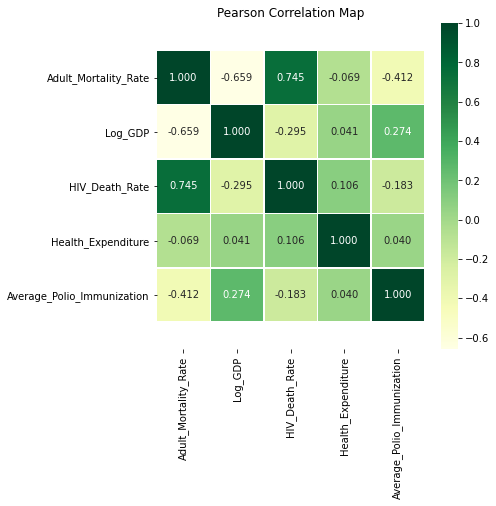

In [10]:
plotting_df = hm[['Adult_Mortality_Rate', 'Log_GDP', 'HIV_Death_Rate', 'Health_Expenditure', 'Average_Polio_Immunization']]

fig, ax = plt.subplots(figsize = (6,6))

sns.heatmap(plotting_df.corr(), annot = True, linewidths=0.5, fmt = ".3f", ax=ax, cmap="YlGn")

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.title('Pearson Correlation Map')
plt.savefig('corr_fig.png', 
            dpi=300, bbox_inches='tight')
plt.show()

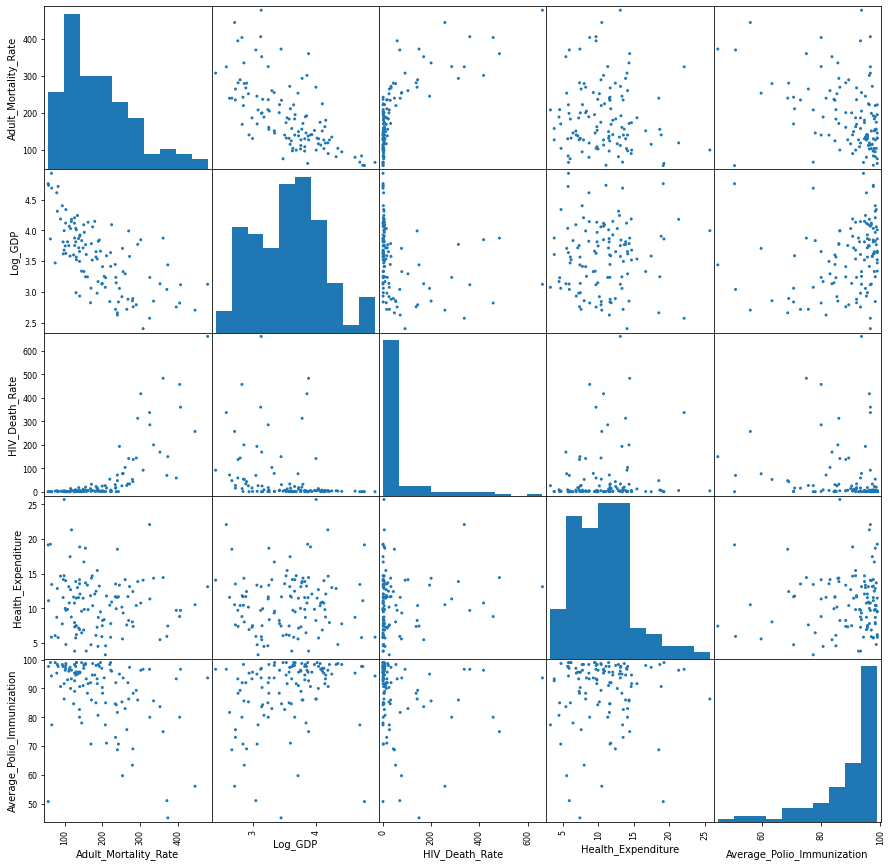

In [15]:
axes = pd.plotting.scatter_matrix(plotting_df, alpha=1, figsize=(15, 15), diagonal='hist', grid=True)
# corr = hm.corr().as_matrix()

# for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
#     axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')

for ax in axes.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)
plt.savefig('Scatter_plot.png', 
            dpi=300, bbox_inches='tight')
plt.show()